In [25]:
from importlib import reload
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import config as cf

In [26]:
reload(cf)

<module 'config' from '/home/ruizfabo/Desktop/d25/exp_d25_version/config.py'>

In [27]:
# original model list
if False:
  models = {'Model': ['(1) camembert-base', '(2) distilcamembert-base',
                      '(3) bert-base-multilingual-cased', '(4) bert-base-multilingual-uncased',
                      '(5) distilbert-base-multilingual-cased',
                      '(6) setfit/distiluse-base-multilingual-cased-v1']}

In [28]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

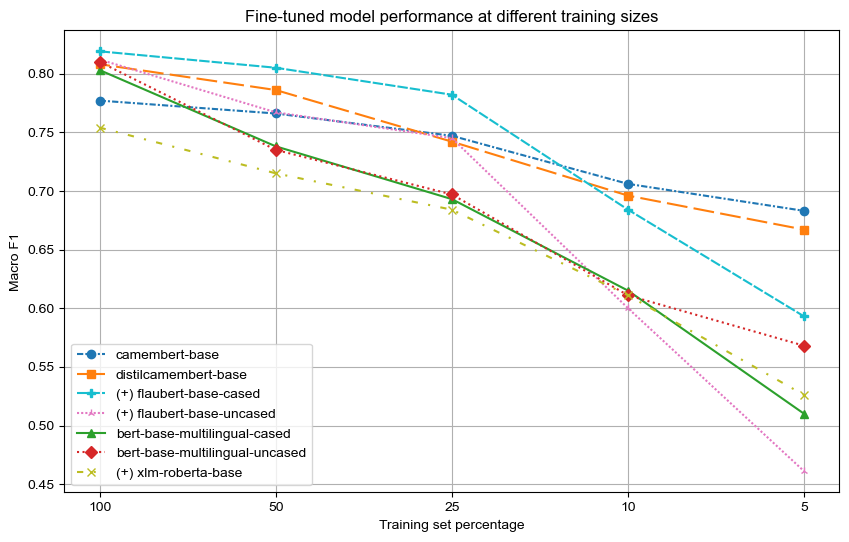

In [29]:
data_old = {
    'Model': ['(1) camembert-base', '(2) distilcamembert-base',
              '(3) bert-base-multilingual-cased', '(4) bert-base-multilingual-uncased',
              '(5) distilbert-base-multilingual-cased',
              '(6) setfit/distiluse-base-multilingual-cased-v1',],
# orig        cb,    dc,    mbc    mbu     dbc    sf
    '100': [0.777, 0.808, 0.803, 0.810, 0.799, 0.7825],
    '50':  [0.766, 0.786, 0.738, 0.735, 0.733, 0.741],
    '25':  [0.747, 0.742, 0.693, 0.697, 0.672, 0.689],
    '10':  [0.706, 0.696, 0.615, 0.611, 0.61,  0.685],
    '5':   [0.683, 0.667, 0.51,  0.568, 0.53,  0.615]
}

    # 'Model': ['(1) camembert-base', '(2) distilcamembert-base',
    #           '(3) flaubert-base-cased', '(4) flaubert-base-uncased',
    #           '(5) bert-base-multilingual-cased',
    #           '(6) bert-base-multilingual-uncased',
    #           '(7) xlm-roberta-base',],


data = {
    'Model': ['camembert-base', 'distilcamembert-base',
              '(+) flaubert-base-cased', '(+) flaubert-base-uncased',
              'bert-base-multilingual-cased',
              'bert-base-multilingual-uncased',
              '(+) xlm-roberta-base',],
# new        cb      dc    fc     fu      mbc    mbu   xrb
    '100': [0.777, 0.808, 0.819, 0.812, 0.803, 0.810, 0.754],
    '50':  [0.766, 0.786, 0.805, 0.767, 0.738, 0.735, 0.715],
    '25':  [0.747, 0.742, 0.782, 0.745, 0.693, 0.697, 0.684],
    '10':  [0.706, 0.696, 0.684, 0.6  , 0.615, 0.611, 0.611],
    '5':   [0.683, 0.667, 0.593, 0.461, 0.51 , 0.568, 0.526]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# old styles
if False:
    linestyles = [(0, (3, 1, 1, 1)), (5, (10,3)), '-', ':', 'solid', (0, (5,1))]
    markers = ['o', 's', '^', 'D', 'v', 'p']

linestyles = [(0, (3, 1, 1, 1)), (5, (10,3)), # cam + d cam
              (0, (5, 1)), (0, (1, 1)),       # flaubert
              '-', ':',                       # mbert
              (0, (3, 5, 1, 5))]              # xlm-roberta
markers = ['o', 's', # cam + d cam
           'P', '2', # flaubert 
           '^', 'D', # mbert
           'x'] # xlm-roberta

# ovrerride tableau 10 color order to match colors in previous paper
colors = ['blue', 'orange',  # cam + d cam
          'cyan', 'pink',    # flaubert
          'green', 'red',    # mbert
          'olive']            # xlm-roberta
colors = [f"tab:{col}" for col in colors]

for i, model in enumerate(df['Model']):
    plt.plot(df.columns[1:], df[df['Model'] == model].values.flatten()[1:], marker=markers[i],
             linestyle=linestyles[i], label=model,
             color=colors[i])


plt.xlabel('Training set percentage')
plt.ylabel('Macro F1')
plt.title('Fine-tuned model performance at different training sizes')
plt.legend(loc='lower left')
plt.grid(True)

#plt.show()

plt.savefig(os.path.join(f"../{cf.ana_dir}", cf.ft_diag_name), format="pdf", bbox_inches="tight")
